# Space ship Data analysis
- In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

# Attribute Informations
- **PassengerID -** A uniqe idd for every passengers in the form of gggg-pp 
- **HomePlanet -** The Passenger departed from which planet
- **CryoSleep -** The passenger in deep sleep untill the saceship reach the destination
- **Cabin -** Cabin Number where the passenger staying
- **Destination -** Where the pasenger leave the space ship
- **Age -** Age of the passenger
- **VIP -** Wheather the passenger paid for VIP service
- **Room Service, Food Court, Shoping Mall, Spa, VR deck -** The amount paid by the costumer for the special service
- **Name -** Name of the Passenger
- **Transported -** Wheather the passenger is divorted into a new dimentations

# Libray Import

In [4]:
# import the library
import numpy as np
import pandas as pd

# For ignore un-wanted error messeges
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [6]:
# Import the dataset
data=pd.read_csv(r"C:\Users\sunil\Downloads\spaceship-titanic\train.csv")
test=pd.read_csv(r"C:\Users\sunil\Downloads\spaceship-titanic\test.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Finding the shape and columns details of the Data

In [8]:
data.shape

(8693, 14)

### The tabel contain 14 columns and 8693 records on it 

In [10]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Finding the information about data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Missing Value Finding

In [14]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- The dataset contains several columns with missing values. The HomePlanet column has 201 missing values, while CryoSleep is missing 217 values. The Cabin column is missing 199 values, and Destination has 182 missing entries. Additionally, the Age column has 179 missing values, and VIP is missing 203 values. Other columns with missing values include RoomService (181), FoodCourt (183), ShoppingMall (208), Spa (183), and VRDeck (188). Lastly, the Name column is missing 200 values. The PassengerId and Transported columns have no missing values.

- **Since the PassengerId column does not have any missing values, it can be retained as a unique identifier for each passenger. However, the Name column has 200 missing values. Since we do not have access to the real data to fill in the missing names, we will drop the Name column to ensure data consistency and avoid complications in analysis.**

In [17]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [18]:
data.shape

(8693, 14)

- Here we see the Name column 200 null values are sucessfully droped. And the total  record 8693 before now it reduce to 8493

To ensure the dataset remains clean and usable for analysis, we fill the missing values using appropriate strategies based on the type of data in each column:

Categorical Columns (HomePlanet, Cabin, Destination, VIP): Missing values are replaced with the mode (most frequently occurring value).
Numerical Columns (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck): Missing values are replaced with the median to prevent distortion caused by outliers.

In [21]:
data["HomePlanet"]=data["HomePlanet"].fillna(data["HomePlanet"].mode()[0])
data["Cabin"]=data["Cabin"].fillna(data["Cabin"].mode()[0])
data["Destination"]=data["Destination"].fillna(data["Destination"].mode()[0])
data["Age"]=data["Age"].fillna(data["Age"].median())
data["VIP"]=data["VIP"].fillna(data["VIP"].mode()[0])
data["RoomService"]=data["RoomService"].fillna(0)
data["FoodCourt"]=data["FoodCourt"].fillna(0)
data["ShoppingMall"]=data["ShoppingMall"].fillna(0)
data["Spa"]=data["Spa"].fillna(0)
data["VRDeck"]=data["VRDeck"].fillna(0)
data["CryoSleep"]=data["CryoSleep"].fillna(data["CryoSleep"].mode()[0])

In [22]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

- From the above missing value tretment we see there is no more any missing values in the data set. as we dont get complete data access the data ammount slightly reduces

In [24]:
data.shape

(8693, 14)

# Duplicated finding

In [26]:
data.duplicated().sum()

0

- Here we see that there is no more duplicates values in the data set. if in the case there is any duplicate value some times we consider asit is or in some time we drop the duplicate values by just using   **data = data.drop_duplicates()**


# Data type correction for each column
### As in the data set there lots off missing values so that we cannot correct the data type of the columns before. after the missing value handeling we can perform this operation
- PassengerId   --> object  
- HomePlanet    --> object  
- CryoSleep     --> object  
- Cabin         --> object  
- Destination   --> object  
- Age           --> int  
- VIP           --> object  
- RoomService   --> float  
- FoodCourt     --> float  
- ShoppingMall  --> float  
- Spa           --> float  
- VRDeck        --> float  
- Name          --> object  
- Transported   --> object  

- 

In [29]:
data["PassengerId"]=data["PassengerId"].astype(object)
data["HomePlanet"]=data["HomePlanet"].astype(object)
data['CryoSleep']=data["CryoSleep"].astype(object)
data["Cabin"]=data["Cabin"].astype(object)
data["Destination"]=data["Destination"].astype(object)
data["Age"]=data["Age"].astype(int)
data["VIP"]=data["VIP"].astype(object)
data["RoomService"]=data["RoomService"].astype(float)
data["FoodCourt"]=data["FoodCourt"].astype(float)
data["ShoppingMall"]=data["ShoppingMall"].astype(float)
data["Spa"]=data["Spa"].astype(float)
data["VRDeck"]=data["VRDeck"].astype(float)
data["Name"]=data["Name"].astype(object)
data["Transported"]=data["Transported"].astype(object)


# Some advance anlysis on data

## Q1. Number of the passenger are in deep sleep and number of passenger are not in deep sleep

In [32]:
data["CryoSleep"].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

## Q2. HomePlanet for how many passengers are in

In [34]:
data["HomePlanet"].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

# Q3. Destination wise anlysis

In [36]:
data["Destination"].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

## Q4. how many passenger are VIP on Non-VIP

In [38]:
data["VIP"].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

## Q5. How many pessengers path are transfpred to new path

In [40]:
data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

## Q6. VIP VS CrySleep

In [42]:

data.groupby("VIP")["CryoSleep"].count()

VIP
False    8494
True      199
Name: CryoSleep, dtype: int64

### The CryoSleep and VIP columns show the following distribution:

- Among passengers who did not opt for CryoSleep (False), 5,343 were not VIPs, while 2,954 were VIPs.
- Among passengers who opted for CryoSleep (True), 175 were not VIPs, while only 21 were VIPs.

## Q7. VIP VS Trasported 

In [45]:

data.groupby("VIP")["PassengerId"].count()

VIP
False    8494
True      199
Name: PassengerId, dtype: int64

### The Transported column indicates whether a passenger was diverted to a new track (True) or not (False), with the following distribution based on VIP status:

- Among non-VIP passengers:

    - 4,093 were not transported to a new track (False).
    - 4,204 were transported to a new track (True).
- Among VIP passengers:

    - 123 were not transported (False).
    - 73 were transported (True).

## Q8. HomePlanet vs PessengerId

In [48]:
data.groupby("HomePlanet")["PassengerId"].count()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: PassengerId, dtype: int64

In [49]:

data.groupby("Destination")["PassengerId"].count()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      6097
Name: PassengerId, dtype: int64

In [50]:
data.shape

(8693, 14)

In [51]:
8693-8693

0

### Lets take all the numerical and categorical columns to find the description on that columns

In [53]:
numeric=data[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age"]]
category=data[["PassengerId","HomePlanet","CryoSleep","Cabin","Destination","VIP","Name","Transported"]]

In [54]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0


In [55]:
category.describe().T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8693,3,Earth,4803
CryoSleep,8693,2,False,5656
Cabin,8693,6560,G/734/S,207
Destination,8693,3,TRAPPIST-1e,6097
VIP,8693,2,False,8494
Name,8493,8473,Gollux Reedall,2
Transported,8693,2,True,4378


In [56]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Visualizations

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

Text(0.5, 1.0, 'Transported distribution')

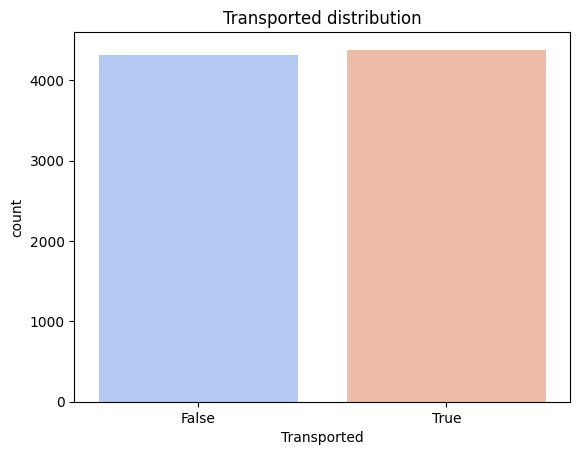

In [60]:
sns.countplot(x=data["Transported"],palette="coolwarm")
plt.title("Transported distribution")

Text(0.5, 1.0, 'Age Distribution')

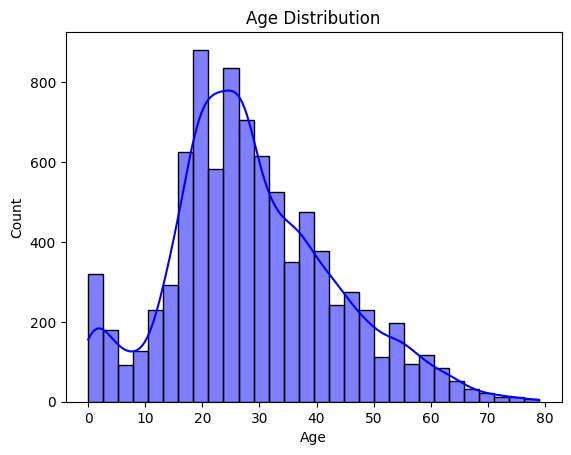

In [61]:
sns.histplot(data["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Spending Behavior on Amenities')

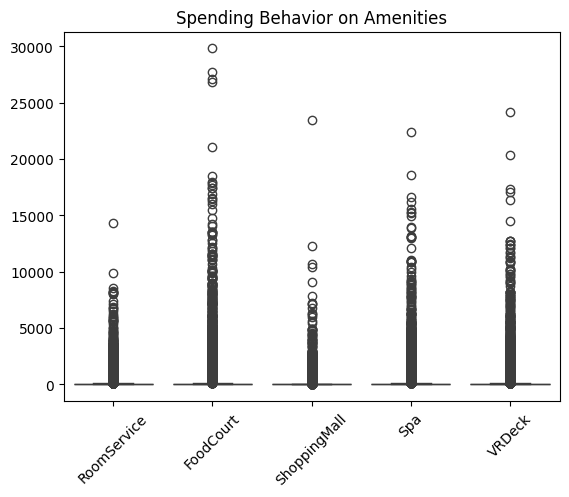

In [62]:
sns.boxplot(data=data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
plt.xticks(rotation=45)
plt.title("Spending Behavior on Amenities")

Text(0.5, 1.0, 'HomePlanet Distribution')

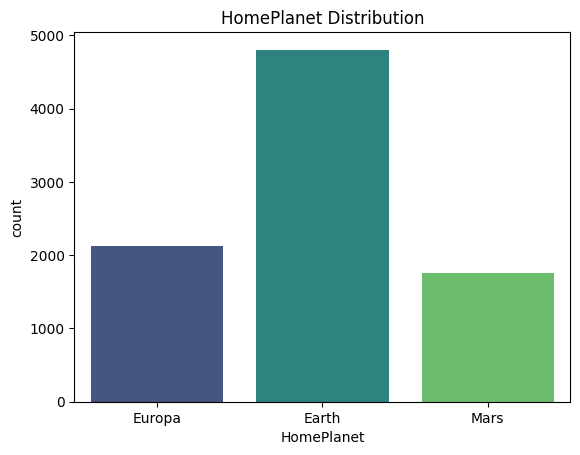

In [63]:
sns.countplot(x=data["HomePlanet"], palette="viridis")
plt.title("HomePlanet Distribution")

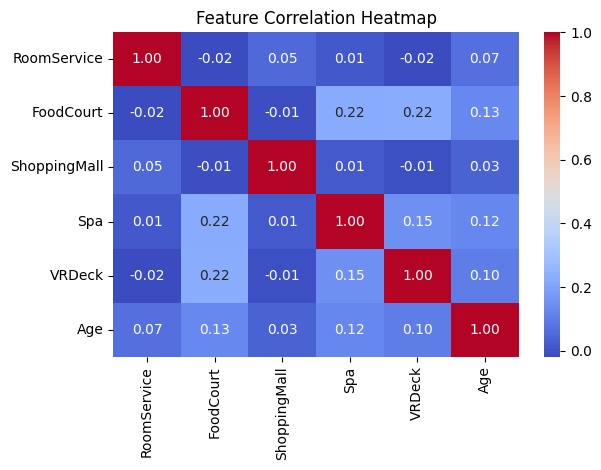

In [64]:
corr_matrix=numeric.corr()


sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# ML model building

In [66]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [67]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [68]:
train_data=data.drop(["PassengerId","Name","Cabin"],axis=1)
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True


In [69]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [70]:
test_data = test.drop(["PassengerId","Name","Cabin"],axis=1)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [71]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder(drop="first")

# encode_data=encoder.fit_transform(train_data)

In [72]:

# Identify categorical columns
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"] 
# Apply One-Hot Encoding using pd.get_dummies()
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (if needed)
train_data_encoded = train_data_encoded.astype(int)



In [73]:
train_data_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39,0,0,0,0,0,1,0,0,0,1,0,0
1,24,109,9,25,549,44,0,0,0,0,1,0,1
2,58,43,3576,0,6715,49,1,0,0,0,1,1,0
3,33,0,1283,371,3329,193,1,0,0,0,1,0,0
4,16,303,70,151,565,2,0,0,0,0,1,0,1


In [74]:
# Dependent and independent variable

x = train_data_encoded.drop(columns=["Transported_True"])
y= train_data_encoded["Transported_True"]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Model 1

In [78]:
# finding best parameter using grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

param_grid={
    "C":[0.01,0.1,2,3,4,6,10,20],
    "solver":["lgfgs","liblinear"],
    "max_iter":[100,200,500,800,1000]
}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy")

grid_search.fit(x_train,y_train)

#best parameter
print("The best parameter: \n",grid_search.best_params_)

The best parameter: 
 {'C': 6, 'max_iter': 100, 'solver': 'liblinear'}


In [79]:
model=LogisticRegression(C=0.1,max_iter=100,solver="liblinear")
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report

accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ",accuracy)
print("The model report: ", report)

# 
bais=model.score(x_train,y_train)
var=model.score(x_test,y_test)

print("The Bais score: ", bais)

print("The variance score: ", var)

The model accuracy:  0.7757331799884991
The model report:                precision    recall  f1-score   support

           0       0.77      0.77      0.77       863
           1       0.78      0.78      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

The Bais score:  0.7867414437733679
The variance score:  0.7757331799884991


In [80]:
model.predict([[23,0,234,122,0,212,0,0,1,0,1,0]])

array([0])

# Model 2 Decission Tree

In [82]:
# Decission Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()

param_grid1={
    "criterion": ["gini", "entropy"],
    "max_depth":[3,5,20,10,15,None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"],
    "splitter": ["best", "random"]
    
}

grid_search1=GridSearchCV(DT,param_grid=param_grid1,cv=5,scoring="accuracy")

grid_search1.fit(x_train,y_train)
print(grid_search1.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [83]:
DT=DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    max_features="sqrt",
    min_samples_leaf=8,
    min_samples_split=10,
    splitter="random",

)

DT.fit(x_train,y_train)

y_pred=DT.predict(x_test)


accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ",accuracy)
print("The model report: ", report)

 
bais=DT.score(x_train,y_train)
var=DT.score(x_test,y_test)

print("The Bais score: ", bais)

print("The variance score: ", var)

The model accuracy:  0.7354801610120759
The model report:                precision    recall  f1-score   support

           0       0.73      0.74      0.74       863
           1       0.74      0.73      0.74       876

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

The Bais score:  0.7499280989358642
The variance score:  0.7354801610120759


# model 3 

In [85]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

params={
    "n_estimators": [50, 100, 200, 500],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False]
}

grid_search=GridSearchCV(RF,param_grid=params,cv=5,scoring="accuracy")

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 200}


In [86]:
RF= RandomForestClassifier(
    bootstrap=True,
    criterion="entropy",
    n_estimators=500,
    max_depth=9
    
)
RF.fit(x_train,y_train)

y_pred=RF.predict(x_test)


accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ",accuracy)
print("The model report: ", report)

 
bais=RF.score(x_train,y_train)
var=RF.score(x_test,y_test)

print("The Bais score: ", bais)

print("The variance score: ", var)

The model accuracy:  0.7912593444508338
The model report:                precision    recall  f1-score   support

           0       0.80      0.77      0.78       863
           1       0.78      0.82      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

The Bais score:  0.8318953120506184
The variance score:  0.7912593444508338


In [208]:
RandomForestClassifier.feature_importances_

# Model 4 xgbooat

In [88]:
# XGBOOST

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgb=XGBClassifier()

xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)


accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ",accuracy)
print("The model report: ", report)

 
bais=xgb.score(x_train,y_train)
var=xgb.score(x_test,y_test)

print("The Bais score: ", bais)

print("The variance score: ", var)


The model accuracy:  0.780333525014376
The model report:                precision    recall  f1-score   support

           0       0.80      0.75      0.77       863
           1       0.76      0.82      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

The Bais score:  0.8832326718435433
The variance score:  0.780333525014376


In [89]:
'''from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

lgbm=lgb.LGBMClassifier()
parms={
    'n_estimators': [100, 300, 500],          
    'learning_rate': [0.01, 0.05, 0.1],       
    'max_depth': [3, 5, 7],                   
    'num_leaves': [20, 31, 40],               
    'lambda_l1': [0, 0.1, 1],                 
    'lambda_l2': [0, 0.1, 1],                 
    'min_child_samples': [10, 20, 30]         

}

grid_search=GridSearchCV(lgbm,param_grid=parms,cv=5,scoring="accuracy",n_jobs=-1,verbose=2)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)'''

'from sklearn.model_selection import GridSearchCV\nimport lightgbm as lgb\n\nlgbm=lgb.LGBMClassifier()\nparms={\n    \'n_estimators\': [100, 300, 500],          \n    \'learning_rate\': [0.01, 0.05, 0.1],       \n    \'max_depth\': [3, 5, 7],                   \n    \'num_leaves\': [20, 31, 40],               \n    \'lambda_l1\': [0, 0.1, 1],                 \n    \'lambda_l2\': [0, 0.1, 1],                 \n    \'min_child_samples\': [10, 20, 30]         \n\n}\n\ngrid_search=GridSearchCV(lgbm,param_grid=parms,cv=5,scoring="accuracy",n_jobs=-1,verbose=2)\n\ngrid_search.fit(x_train,y_train)\n\nprint(grid_search.best_params_)'

In [90]:
# LGBM
import lightgbm as lgb

lgbm=lgb.LGBMClassifier()

lgbm.fit(x_train,y_train)

y_pred=lgbm.predict(x_test)


accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ",accuracy)
print("The model report: ", report)

 
bais=lgbm.score(x_train,y_train)
var=lgbm.score(x_test,y_test)

print("The Bais score: ", bais)

print("The variance score: ", var)


[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
The model accuracy:  0.7826336975273146
The model report:                precision    recall  f1-score   support

           0       0.80      0.74      0.77       863
           1       0.76      0.82      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

The Bais score:  0.8547598504457866
The variance score:  0.78

# Model 5

In [92]:
# Bernoulli nb

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  

nb = BernoulliNB()
grid = GridSearchCV(nb, param_grid=params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print(grid.best_params_)  # Best alpha value


{'alpha': 1.0}


In [93]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report

nb=BernoulliNB(alpha=0.1)

nb.fit(x_train,y_train)

y_pred=nb.predict(x_test)


accuracy = accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ", accuracy)
print("report: ",report)

bais=nb.score(x_train,y_train)
var=nb.score(x_test,y_test)

print("Bais: ", bais)
print("Variance: ",var)

The model accuracy:  0.7464059804485337
report:                precision    recall  f1-score   support

           0       0.71      0.82      0.76       863
           1       0.79      0.67      0.73       876

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739

Bais:  0.7538107563991947
Variance:  0.7464059804485337


# Model 6

In [95]:
# Bernoulli nb

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  

gn = GaussianNB()
grid = GridSearchCV(nb, param_grid=params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print(grid.best_params_)  # Best alpha value


{'alpha': 1.0}


In [96]:
# BGausian
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

gn=GaussianNB()

gn.fit(x_train,y_train)

y_pred=gn.predict(x_test)


accuracy = accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ", accuracy)
print("report: ",report)

bais=gn.score(x_train,y_train)
var=gn.score(x_test,y_test)

print("Bais: ", bais)
print("Variance: ",var)

The model accuracy:  0.6912018401380103
report:                precision    recall  f1-score   support

           0       0.85      0.46      0.60       863
           1       0.63      0.92      0.75       876

    accuracy                           0.69      1739
   macro avg       0.74      0.69      0.67      1739
weighted avg       0.74      0.69      0.67      1739

Bais:  0.7070750647109577
Variance:  0.6912018401380103


# Model 7

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
sv=SVC()
params = {
    'C': [0.1, 1, 10],       
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto'] 
}

grid_svc = GridSearchCV(sv, param_grid=params, cv=5, scoring='accuracy')
grid_svc.fit(x_train, y_train)

print("Best Parameters:", grid_svc.best_params_)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [99]:

sv=SVC(C=10, gamma="scale",kernel="rbf")

sv.fit(x_train,y_train)

y_pred=sv.predict(x_test)


accuracy = accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ", accuracy)
print("report: ",report)

bais=sv.score(x_train,y_train)
var=sv.score(x_test,y_test)

print("Bais: ", bais)
print("Variance: ",var)


The model accuracy:  0.7809085681426107
report:                precision    recall  f1-score   support

           0       0.78      0.77      0.78       863
           1       0.78      0.79      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Bais:  0.8025596778832327
Variance:  0.7809085681426107


# Model 8

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
params={
    "n_neighbors": np.arange(1,50)
}

grid_knn=GridSearchCV(knn,param_grid=params,cv=5,scoring="accuracy")
grid_knn.fit(x_train,y_train)

print(grid_knn.best_params_)


{'n_neighbors': 31}


In [102]:
knn=KNeighborsClassifier(n_neighbors=13)

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

bais=knn.score(x_train,y_train)
var=knn.score(x_test,y_test)

print("model accuracy: ", accuracy)
print("model report: ",report)

print("bais: ", bais)
print("variance: ",var)

model accuracy:  0.7717078780908568
model report:                precision    recall  f1-score   support

           0       0.79      0.74      0.76       863
           1       0.76      0.80      0.78       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

bais:  0.8097497842968076
variance:  0.7717078780908568


# Model 9

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gs=GradientBoostingClassifier()

params={
    "n_estimators":[50,100,150,200],
    "learning_rate":[0.1,0.3,1,0.001]
}

param_grid_gs=GridSearchCV(gs,param_grid=params,cv=5,scoring="accuracy")

param_grid_gs.fit(x_train,y_train)

print(param_grid_gs.best_params_)

{'learning_rate': 0.3, 'n_estimators': 50}


In [105]:
gs=GradientBoostingClassifier(n_estimators=150, learning_rate=0.1)


gs.fit(x_train,y_train)

y_pred=gs.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

bais=gs.score(x_train,y_train)
var=gs.score(x_test,y_test)

print("model accuracy: ", accuracy)
print("model report: ",report)

print("bais: ", bais)
print("variance: ",var)

model accuracy:  0.780333525014376
model report:                precision    recall  f1-score   support

           0       0.81      0.73      0.77       863
           1       0.76      0.83      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

bais:  0.815070463042853
variance:  0.780333525014376


# Model 10

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()

params = {
    "n_estimators":[50,100,150,200]
    
}

param_grid_ex=GridSearchCV(ex,param_grid=params,cv=5,scoring="accuracy")

param_grid_ex.fit(x_train,y_train)

print(param_grid_ex.best_params_)

{'n_estimators': 50}


In [108]:
ex=ExtraTreesClassifier(n_estimators=150)

ex.fit(x_train,y_train)

y_pred=ex.predict(x_test)


accuracy=accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

bais=ex.score(x_train,y_train)
var=ex.score(x_test,y_test)

print("model accuracy: ", accuracy)
print("model report: ",report)

print("bais: ", bais)
print("variance: ",var)


model accuracy:  0.7722829212190915
model report:                precision    recall  f1-score   support

           0       0.77      0.77      0.77       863
           1       0.77      0.78      0.77       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

bais:  0.9319815933275812
variance:  0.7722829212190915


# Model 11

In [110]:
from sklearn.ensemble import AdaBoostClassifier

adb=AdaBoostClassifier()

params={
    "n_estimators":[50,100,150,200,250,300],
    "learning_rate":[0.01,0.1,0.05,1,1.5],
    "algorithm":["SAMME","SAMME.R"]
}

param_grid_adb=GridSearchCV(adb,param_grid=params,cv=5,scoring="accuracy")

param_grid_adb.fit(x_train,y_train)

print(param_grid_adb.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300}


In [111]:
adb=AdaBoostClassifier(n_estimators=250,algorithm="SAMME.R",learning_rate=0.1)

adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

bais=adb.score(x_train,y_train)
var=adb.score(x_test,y_test)

print("model accuracy: ", accuracy)
print("model report: ",report)

print("bais: ", bais)
print("variance: ",var)



model accuracy:  0.7837837837837838
model report:                precision    recall  f1-score   support

           0       0.79      0.76      0.78       863
           1       0.78      0.80      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

bais:  0.7976704055220017
variance:  0.7837837837837838


In [112]:
l=[1,2,3]
squre=np.array(l)**2
squre

array([1, 4, 9])

In [113]:
l=[1,2,3,4]

squared_list = list(map(lambda x: x**2, l))
squared_list


[1, 4, 9, 16]

In [114]:
l=[1,2,3,4,5,4,5,6,7,8,9,5,34,23]
squre=[]
for i in l:
    s=i**2
    squre.append(s)
squre
    

[1, 4, 9, 16, 25, 16, 25, 36, 49, 64, 81, 25, 1156, 529]

###### 

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Gini Decision Tree
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

# Entropy Decision Tree
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Compare Accuracy
print("Gini Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))


Gini Accuracy: 1.0
Entropy Accuracy: 1.0


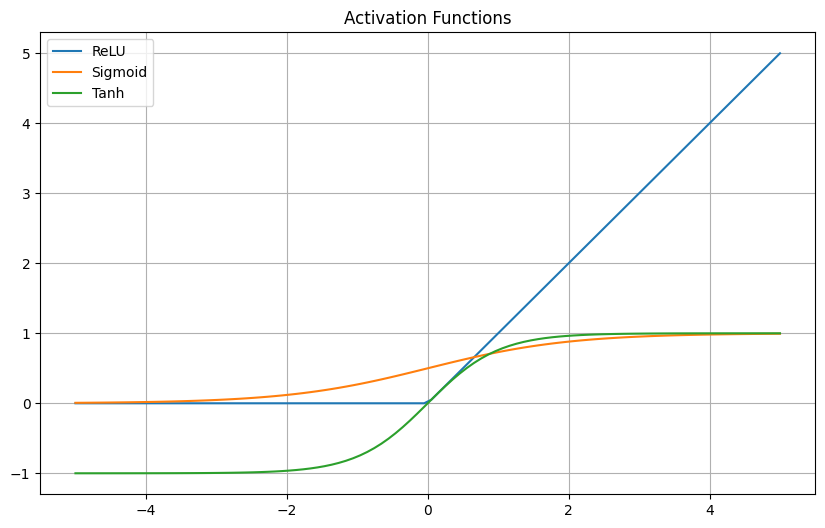

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-5, 5, 100)

# Plot the activation functions
plt.figure(figsize=(10, 6))
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, tanh(x), label="Tanh")
plt.legend()
plt.title("Activation Functions")
plt.grid()
plt.show()
